# Activity 2.3 - CNN Network Architectures

#### Objective(s):

This activity aims to introduce how to use CNN network architectures

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to use pretrained model in predicting the object
* Evaluate the accuracy of each pretrained model

#### Resources:
* Jupyter Notebook
* MNIST

#### Procedures
Load the necessary libraries

In [1]:
# install opencv if you haven't
#!pip install opencv-python
#!pip install pillow

In [1]:
from PIL import Image
from keras.preprocessing import image
import numpy as np
import pandas as pd

import cv2
#from scipy.misc.pilutil import imread

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

C:\Users\admin\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Create a function that will capture and save the image from your webcam

In [3]:
def get_image(camera):
    retval, im = camera.read()
    return im

In [2]:
def save_webcam_image(img_path):

    try:
        camera_port = 0
        ramp_frames = 10

        camera = cv2.VideoCapture(camera_port)

        for i in range(ramp_frames):
            retval, im_camera = camera.read()

        retval, im_camera = camera.read()

        im = cv2.resize(im_camera, (224, 224)).astype(np.float32)
        cv2.imwrite(img_path, im)
        camera.release()
        return True
    except Exception as e:
        print("Image Capture Failed:", e)
        return False

* Test your function.
* Place a clock or any object
* Display the saved image

In [39]:
img_path = "webcam_test_img.png"

if save_webcam_image(img_path) is False:
    # Webcam not active, use the Dog Image
    img_path = "rocking_chair.jpg"
    print("Using the Test Rocking Chair Image: {}".format(img_path))

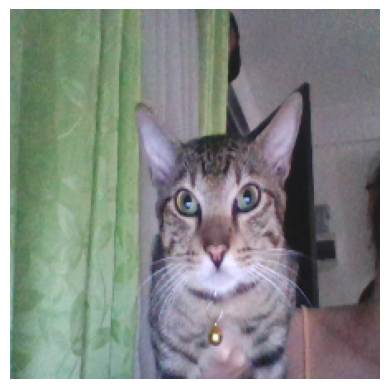

In [40]:
img = mpimg.imread(img_path)
plt.imshow(img)
plt.axis('off')
plt.show()

Use VGG-16 pre-trained model

In [12]:
from keras.applications import vgg16


vgg16_model = vgg16.VGG16(weights='imagenet')
vgg16_model.summary()



Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

Create a function to load model, image, preprocess input and targets

In [41]:
def predict_image(model, img_path, preprocess_input_fn, decode_predictions_fn, target_size=(224, 224)):

    img = image.load_img(img_path, target_size=target_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input_fn(x)

    preds = model.predict(x)
    predictions_df = pd.DataFrame(decode_predictions_fn(preds, top=10)[0])
    predictions_df.columns = ["Predicted Class", "Name", "Probability"]
    return predictions_df

Predict the result

In [42]:
predict_image(vgg16_model, img_path, vgg16.preprocess_input, vgg16.decode_predictions)

1/1 [==============================] - 3s 3s/step


,Predicted Class,Name,Probability
0,n02124075,Egyptian_cat,0.548576
1,n02123045,tabby,0.154715
2,n02127052,lynx,0.107514
3,n02123159,tiger_cat,0.057994
4,n02971356,carton,0.022098
5,n04209239,shower_curtain,0.007197
6,n03958227,plastic_bag,0.007013
7,n02808304,bath_towel,0.004000
8,n04023962,punching_bag,0.003990
9,n04522168,vase,0.003413


Interpret the result of prediction using VGG16 model

The VGG16 model's top predictions align with the image of me holding a tabby cat, with the highest probability assigned to an "Egyptian cat." However, this model's performance might vary depending on factor like the quality of the image captured by the webcam.

Use Resnet50 pretrained model

In [27]:
from keras.applications import resnet50

resnet50_model = resnet50.ResNet50(weights='imagenet')

resnet50_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 56, 56, 64)           16448     ['conv2_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 56, 56, 64)           256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block3_1_relu (Activ  (None, 56, 56, 64)           0         ['conv2_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_blo

 ation)                                                                                           
                                                                                                  
 conv3_block2_3_conv (Conv2  (None, 28, 28, 512)          66048     ['conv3_block2_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block2_3_bn (BatchNo  (None, 28, 28, 512)          2048      ['conv3_block2_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block2_add (Add)      (None, 28, 28, 512)          0         ['conv3_block1_out[0][0]',    
                                                                     'conv3_block2_3_bn[0][0]']   
          

 conv4_block1_2_conv (Conv2  (None, 14, 14, 256)          590080    ['conv4_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block1_2_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block1_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_2_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block1_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_0_conv (Conv2  (None, 14, 14, 1024)         525312    ['conv3_block4_out[0][0]']    
 D)       

                                                                                                  
 conv4_block3_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block3_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv4_block4_1_conv (Conv2  (None, 14, 14, 256)          262400    ['conv4_block3_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv4_block4_1_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block6_3_bn (BatchNo  (None, 14, 14, 1024)         4096      ['conv4_block6_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block6_add (Add)      (None, 14, 14, 1024)         0         ['conv4_block5_out[0][0]',    
                                                                     'conv4_block6_3_bn[0][0]']   
                                                                                                  
 conv4_block6_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block6_add[0][0]']    
 on)                                                                                              
          

 conv5_block3_1_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block3_2_conv (Conv2  (None, 7, 7, 512)            2359808   ['conv5_block3_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block3_2_bn (BatchNo  (None, 7, 7, 512)            2048      ['conv5_block3_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block3_2_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_2_bn[0][0]']   
 ation)   

Predict the result

In [43]:
predict_image(resnet50_model, img_path, resnet50.preprocess_input, resnet50.decode_predictions)

1/1 [==============================] - 2s 2s/step


,Predicted Class,Name,Probability
0,n02124075,Egyptian_cat,0.590516
1,n02123045,tabby,0.318831
2,n02123159,tiger_cat,0.077790
3,n02127052,lynx,0.005187
4,n04209239,shower_curtain,0.001803
5,n04589890,window_screen,0.000723
6,n02123597,Siamese_cat,0.000379
7,n03950228,pitcher,0.000326
8,n03443371,goblet,0.000236
9,n03958227,plastic_bag,0.000212


Interpret the result using RESNET50 pretrained model

Just like the VGG16 model, it appears to have a similar understanding of the image as the VGG16 model, correctly identifying it as likely containing an Egyptian cat and possibly a tabby. However, the ResNet50 model seems to be slightly more confident in its predictions, particularly for the "Egyptian_cat" class.

#### Supplementary Activity

* Use at least three pretrained model and predict the result using the saved image.
* Compare their accuracy results.

## Using MobileNet v2 Model

In [29]:
from keras.applications import mobilenet_v2

mobilenet_v2_model = mobilenet_v2.MobileNetV2(weights='imagenet')

mobilenet_v2_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_3[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

 block_3_expand_relu (ReLU)  (None, 56, 56, 144)          0         ['block_3_expand_BN[0][0]']   
                                                                                                  
 block_3_pad (ZeroPadding2D  (None, 57, 57, 144)          0         ['block_3_expand_relu[0][0]'] 
 )                                                                                                
                                                                                                  
 block_3_depthwise (Depthwi  (None, 28, 28, 144)          1296      ['block_3_pad[0][0]']         
 seConv2D)                                                                                        
                                                                                                  
 block_3_depthwise_BN (Batc  (None, 28, 28, 144)          576       ['block_3_depthwise[0][0]']   
 hNormalization)                                                                                  
          

 block_6_depthwise_BN (Batc  (None, 14, 14, 192)          768       ['block_6_depthwise[0][0]']   
 hNormalization)                                                                                  
                                                                                                  
 block_6_depthwise_relu (Re  (None, 14, 14, 192)          0         ['block_6_depthwise_BN[0][0]']
 LU)                                                                                              
                                                                                                  
 block_6_project (Conv2D)    (None, 14, 14, 64)           12288     ['block_6_depthwise_relu[0][0]
                                                                    ']                            
                                                                                                  
 block_6_project_BN (BatchN  (None, 14, 14, 64)           256       ['block_6_project[0][0]']     
 ormalizat

                                                                                                  
 block_9_add (Add)           (None, 14, 14, 64)           0         ['block_8_add[0][0]',         
                                                                     'block_9_project_BN[0][0]']  
                                                                                                  
 block_10_expand (Conv2D)    (None, 14, 14, 384)          24576     ['block_9_add[0][0]']         
                                                                                                  
 block_10_expand_BN (BatchN  (None, 14, 14, 384)          1536      ['block_10_expand[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_10_expand_relu (ReLU  (None, 14, 14, 384)          0         ['block_10_expand_BN[0][0]']  
 )        

                                                                                                  
 block_13_expand_relu (ReLU  (None, 14, 14, 576)          0         ['block_13_expand_BN[0][0]']  
 )                                                                                                
                                                                                                  
 block_13_pad (ZeroPadding2  (None, 15, 15, 576)          0         ['block_13_expand_relu[0][0]']
 D)                                                                                               
                                                                                                  
 block_13_depthwise (Depthw  (None, 7, 7, 576)            5184      ['block_13_pad[0][0]']        
 iseConv2D)                                                                                       
                                                                                                  
 block_13_

 iseConv2D)                                                                                       
                                                                                                  
 block_16_depthwise_BN (Bat  (None, 7, 7, 960)            3840      ['block_16_depthwise[0][0]']  
 chNormalization)                                                                                 
                                                                                                  
 block_16_depthwise_relu (R  (None, 7, 7, 960)            0         ['block_16_depthwise_BN[0][0]'
 eLU)                                                               ]                             
                                                                                                  
 block_16_project (Conv2D)   (None, 7, 7, 320)            307200    ['block_16_depthwise_relu[0][0
                                                                    ]']                           
          

In [44]:
predict_image(mobilenet_v2_model, img_path, mobilenet_v2.preprocess_input, mobilenet_v2.decode_predictions)

1/1 [==============================] - 1s 561ms/step


,Predicted Class,Name,Probability
0,n02123045,tabby,0.466096
1,n02124075,Egyptian_cat,0.323030
2,n02123159,tiger_cat,0.125860
3,n02127052,lynx,0.009524
4,n04209239,shower_curtain,0.001527
5,n02808304,bath_towel,0.001365
6,n02971356,carton,0.001291
7,n03877472,pajama,0.000928
8,n04525038,velvet,0.000778
9,n02123597,Siamese_cat,0.000752


On the other hand, MobileNet V2 model's predictions align well because I was holding a tabby cat, with the highest probability assigned to the "tabby" class. This just shows that the model's effectiveness in accurately identifying images and its ability to recognize specific features associated with different cat breeds.

## Using Inception v3 Model

In [31]:
from keras.applications import inception_v3

inception_v3_model = inception_v3.InceptionV3(weights='imagenet')
inception_v3_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 149, 149, 32)         864       ['input_4[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 149, 149, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 149, 149, 32)         0         ['batch_normalizati

 conv2d_11 (Conv2D)          (None, 35, 35, 32)           6144      ['average_pooling2d[0][0]']   
                                                                                                  
 batch_normalization_5 (Bat  (None, 35, 35, 64)           192       ['conv2d_5[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 batch_normalization_7 (Bat  (None, 35, 35, 64)           192       ['conv2d_7[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 batch_normalization_10 (Ba  (None, 35, 35, 96)           288       ['conv2d_10[0][0]']           
 tchNormalization)                                                                                
          

                                                                                                  
 activation_17 (Activation)  (None, 35, 35, 96)           0         ['batch_normalization_17[0][0]
                                                                    ']                            
                                                                                                  
 activation_18 (Activation)  (None, 35, 35, 64)           0         ['batch_normalization_18[0][0]
                                                                    ']                            
                                                                                                  
 mixed1 (Concatenate)        (None, 35, 35, 288)          0         ['activation_12[0][0]',       
                                                                     'activation_14[0][0]',       
                                                                     'activation_17[0][0]',       
          

                                                                                                  
 conv2d_28 (Conv2D)          (None, 35, 35, 96)           55296     ['activation_27[0][0]']       
                                                                                                  
 batch_normalization_28 (Ba  (None, 35, 35, 96)           288       ['conv2d_28[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_28 (Activation)  (None, 35, 35, 96)           0         ['batch_normalization_28[0][0]
                                                                    ']                            
                                                                                                  
 conv2d_26 (Conv2D)          (None, 17, 17, 384)          995328    ['mixed2[0][0]']              
          

 conv2d_30 (Conv2D)          (None, 17, 17, 192)          147456    ['mixed3[0][0]']              
                                                                                                  
 conv2d_33 (Conv2D)          (None, 17, 17, 192)          172032    ['activation_32[0][0]']       
                                                                                                  
 conv2d_38 (Conv2D)          (None, 17, 17, 192)          172032    ['activation_37[0][0]']       
                                                                                                  
 conv2d_39 (Conv2D)          (None, 17, 17, 192)          147456    ['average_pooling2d_3[0][0]'] 
                                                                                                  
 batch_normalization_30 (Ba  (None, 17, 17, 192)          576       ['conv2d_30[0][0]']           
 tchNormalization)                                                                                
          

                                                                    ']                            
                                                                                                  
 average_pooling2d_4 (Avera  (None, 17, 17, 768)          0         ['mixed4[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_40 (Conv2D)          (None, 17, 17, 192)          147456    ['mixed4[0][0]']              
                                                                                                  
 conv2d_43 (Conv2D)          (None, 17, 17, 192)          215040    ['activation_42[0][0]']       
                                                                                                  
 conv2d_48 (Conv2D)          (None, 17, 17, 192)          215040    ['activation_47[0][0]']       
          

                                                                                                  
 activation_52 (Activation)  (None, 17, 17, 160)          0         ['batch_normalization_52[0][0]
                                                                    ']                            
                                                                                                  
 activation_57 (Activation)  (None, 17, 17, 160)          0         ['batch_normalization_57[0][0]
                                                                    ']                            
                                                                                                  
 average_pooling2d_5 (Avera  (None, 17, 17, 768)          0         ['mixed5[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_50

 batch_normalization_62 (Ba  (None, 17, 17, 192)          576       ['conv2d_62[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_67 (Ba  (None, 17, 17, 192)          576       ['conv2d_67[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_62 (Activation)  (None, 17, 17, 192)          0         ['batch_normalization_62[0][0]
                                                                    ']                            
                                                                                                  
 activation_67 (Activation)  (None, 17, 17, 192)          0         ['batch_normalization_67[0][0]
          

                                                                                                  
 conv2d_71 (Conv2D)          (None, 8, 8, 320)            552960    ['activation_70[0][0]']       
                                                                                                  
 conv2d_75 (Conv2D)          (None, 8, 8, 192)            331776    ['activation_74[0][0]']       
                                                                                                  
 batch_normalization_71 (Ba  (None, 8, 8, 320)            960       ['conv2d_71[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_75 (Ba  (None, 8, 8, 192)            576       ['conv2d_75[0][0]']           
 tchNormalization)                                                                                
          

                                                                                                  
 activation_82 (Activation)  (None, 8, 8, 384)            0         ['batch_normalization_82[0][0]
                                                                    ']                            
                                                                                                  
 activation_83 (Activation)  (None, 8, 8, 384)            0         ['batch_normalization_83[0][0]
                                                                    ']                            
                                                                                                  
 batch_normalization_84 (Ba  (None, 8, 8, 192)            576       ['conv2d_84[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activatio

                                                                                                  
 activation_88 (Activation)  (None, 8, 8, 384)            0         ['batch_normalization_88[0][0]
                                                                    ']                            
                                                                                                  
 activation_91 (Activation)  (None, 8, 8, 384)            0         ['batch_normalization_91[0][0]
                                                                    ']                            
                                                                                                  
 activation_92 (Activation)  (None, 8, 8, 384)            0         ['batch_normalization_92[0][0]
                                                                    ']                            
                                                                                                  
 batch_nor

In [45]:
def predict_image_ict(model, img_path, preprocess_input_fn, decode_predictions_fn, target_size=(299, 299)): # Change target_size to (299, 299)
    img = image.load_img(img_path, target_size=(target_size)) # Load image with target_size (299, 299)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input_fn(x)

    preds = model.predict(x)
    predictions_df = pd.DataFrame(decode_predictions_fn(preds, top=10)[0])
    predictions_df.columns = ["Predicted Class", "Name", "Probability"]
    return predictions_df

In [46]:
predict_image_ict(inception_v3_model, img_path, inception_v3.preprocess_input, inception_v3.decode_predictions)

1/1 [==============================] - 1s 847ms/step


,Predicted Class,Name,Probability
0,n02123045,tabby,0.426275
1,n02124075,Egyptian_cat,0.358753
2,n02123159,tiger_cat,0.155947
3,n02127052,lynx,0.001369
4,n02971356,carton,0.001059
5,n04589890,window_screen,0.001036
6,n02123597,Siamese_cat,0.000650
7,n04265275,space_heater,0.000625
8,n04550184,wardrobe,0.000541
9,n04040759,radiator,0.000535


I have heard of this model from the past. Just like the other models, the Inception V3 model's predictions are in line with the expected content of the image, indicating a high likelihood that it contains a tabby cat. And based on its probability score, it shows that it is pretty confident about this prediction. 

## Using Efficient Net B0 Model

In [47]:
from keras.applications import EfficientNetB0
from keras.applications.efficientnet import preprocess_input
from keras.applications.imagenet_utils import decode_predictions

efficientnet_b0_model = EfficientNetB0(weights='imagenet')
efficientnet_b0_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling_4 (Rescaling)     (None, 224, 224, 3)          0         ['input_7[0][0]']             
                                                                                                  
 normalization_2 (Normaliza  (None, 224, 224, 3)          7         ['rescaling_4[0][0]']         
 tion)                                                                                            
                                                                                                  
 rescaling_5 (Rescaling)     (None, 224, 224, 3)          0         ['normalization_2

 y)                                                                  'block2a_se_expand[0][0]']   
                                                                                                  
 block2a_project_conv (Conv  (None, 56, 56, 24)           2304      ['block2a_se_excite[0][0]']   
 2D)                                                                                              
                                                                                                  
 block2a_project_bn (BatchN  (None, 56, 56, 24)           96        ['block2a_project_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 block2b_expand_conv (Conv2  (None, 56, 56, 144)          3456      ['block2a_project_bn[0][0]']  
 D)                                                                                               
          

                                                                                                  
 block3a_project_conv (Conv  (None, 28, 28, 40)           5760      ['block3a_se_excite[0][0]']   
 2D)                                                                                              
                                                                                                  
 block3a_project_bn (BatchN  (None, 28, 28, 40)           160       ['block3a_project_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 block3b_expand_conv (Conv2  (None, 28, 28, 240)          9600      ['block3a_project_bn[0][0]']  
 D)                                                                                               
                                                                                                  
 block3b_e

 block4a_project_conv (Conv  (None, 14, 14, 80)           19200     ['block4a_se_excite[0][0]']   
 2D)                                                                                              
                                                                                                  
 block4a_project_bn (BatchN  (None, 14, 14, 80)           320       ['block4a_project_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 block4b_expand_conv (Conv2  (None, 14, 14, 480)          38400     ['block4a_project_bn[0][0]']  
 D)                                                                                               
                                                                                                  
 block4b_expand_bn (BatchNo  (None, 14, 14, 480)          1920      ['block4b_expand_conv[0][0]'] 
 rmalizati

 ormalization)                                                                                    
                                                                                                  
 block4c_drop (Dropout)      (None, 14, 14, 80)           0         ['block4c_project_bn[0][0]']  
                                                                                                  
 block4c_add (Add)           (None, 14, 14, 80)           0         ['block4c_drop[0][0]',        
                                                                     'block4b_add[0][0]']         
                                                                                                  
 block5a_expand_conv (Conv2  (None, 14, 14, 480)          38400     ['block4c_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block5a_e

 block5b_add (Add)           (None, 14, 14, 112)          0         ['block5b_drop[0][0]',        
                                                                     'block5a_project_bn[0][0]']  
                                                                                                  
 block5c_expand_conv (Conv2  (None, 14, 14, 672)          75264     ['block5b_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block5c_expand_bn (BatchNo  (None, 14, 14, 672)          2688      ['block5c_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block5c_expand_activation   (None, 14, 14, 672)          0         ['block5c_expand_bn[0][0]']   
 (Activati

 ormalization)                                                                                    
                                                                                                  
 block6b_expand_conv (Conv2  (None, 7, 7, 1152)           221184    ['block6a_project_bn[0][0]']  
 D)                                                                                               
                                                                                                  
 block6b_expand_bn (BatchNo  (None, 7, 7, 1152)           4608      ['block6b_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block6b_expand_activation   (None, 7, 7, 1152)           0         ['block6b_expand_bn[0][0]']   
 (Activation)                                                                                     
          

 block6c_add (Add)           (None, 7, 7, 192)            0         ['block6c_drop[0][0]',        
                                                                     'block6b_add[0][0]']         
                                                                                                  
 block6d_expand_conv (Conv2  (None, 7, 7, 1152)           221184    ['block6c_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block6d_expand_bn (BatchNo  (None, 7, 7, 1152)           4608      ['block6d_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block6d_expand_activation   (None, 7, 7, 1152)           0         ['block6d_expand_bn[0][0]']   
 (Activati

                                                                                                  
 top_bn (BatchNormalization  (None, 7, 7, 1280)           5120      ['top_conv[0][0]']            
 )                                                                                                
                                                                                                  
 top_activation (Activation  (None, 7, 7, 1280)           0         ['top_bn[0][0]']              
 )                                                                                                
                                                                                                  
 avg_pool (GlobalAveragePoo  (None, 1280)                 0         ['top_activation[0][0]']      
 ling2D)                                                                                          
                                                                                                  
 top_dropo

In [48]:
predict_image(efficientnet_b0_model, img_path, preprocess_input, decode_predictions)

1/1 [==============================] - 4s 4s/step


,Predicted Class,Name,Probability
0,n02123045,tabby,0.494894
1,n02124075,Egyptian_cat,0.236135
2,n02123159,tiger_cat,0.156442
3,n02127052,lynx,0.011692
4,n02971356,carton,0.003152
5,n04209239,shower_curtain,0.002558
6,n04589890,window_screen,0.001193
7,n02909870,bucket,0.001073
8,n02123597,Siamese_cat,0.001042
9,n04040759,radiator,0.001022


As for the Efficient Net B0 Model, the highest probability assigned to it is the "tabby" class, indicating that it believes there is a significant chance (49.49%) that the image contains a tabby cat. This model is also predicting well.

#### Conclusion

In conclusion, when comparing the predictions of the Inception V3, MobileNet V2, and EfficientNet B0 models, all three demonstrate a consistent ability to recognize the image as likely containing a tabby cat. Even though they might have slight differences in their predictions, the primary prediction of a tabby cat remains strong. Moreover, the models show good judgment by giving low probabilities to unrelated objects like cartons or shower curtains. EfficientNet typically achieves the highest accuracy among the three models, followed by Inception and then MobileNet. This suggests they're able to tell what's important and what's not in the image. Overall, the reliability and accuracy across different models show they're dependable and effective at recognizing images.